In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import os

In [4]:
os.chdir ("C:\\Users\\saharlamuhumedhussei")
os.getcwd

<function nt.getcwd()>

In [5]:
insurance = pd.read_csv(r"C:\Users\saharlamuhumedhussei\OneDrive - HvA\Desktop\Python\Insurance.csv")


## Dataframe

In [6]:
import pandas as pd

# Path to the csv file
file_path = r"C:\Users\saharlamuhumedhussei\OneDrive - HvA\Desktop\Python\Insurance.csv"

# Read the CSV file into a DataFrame
insurance = pd.read_csv(file_path)

# Display the data
print(insurance)

      age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]


## Mean expenses for region
- - to get a better understanding about the mean age in the dataset

In [7]:
# 'region' and 'expenses' columns in the data set
regions = insurance['region'].unique()
mean_expenses_by_region = {}

for region in regions:
    mean_expenses = insurance[insurance['region'] == region]['expenses'].mean()
    mean_expenses_by_region[region] = mean_expenses

# Print the mean expenses for each region
for region, mean_expenses in mean_expenses_by_region.items():
    print(f"Mean Expenses for {region}: {mean_expenses:.2f}")


Mean Expenses for southwest: 12346.94
Mean Expenses for southeast: 14735.41
Mean Expenses for northwest: 12417.58
Mean Expenses for northeast: 13406.38


## Visualize the mean insurance expenses by region
- to get a better understanding about the mean age in the dataset

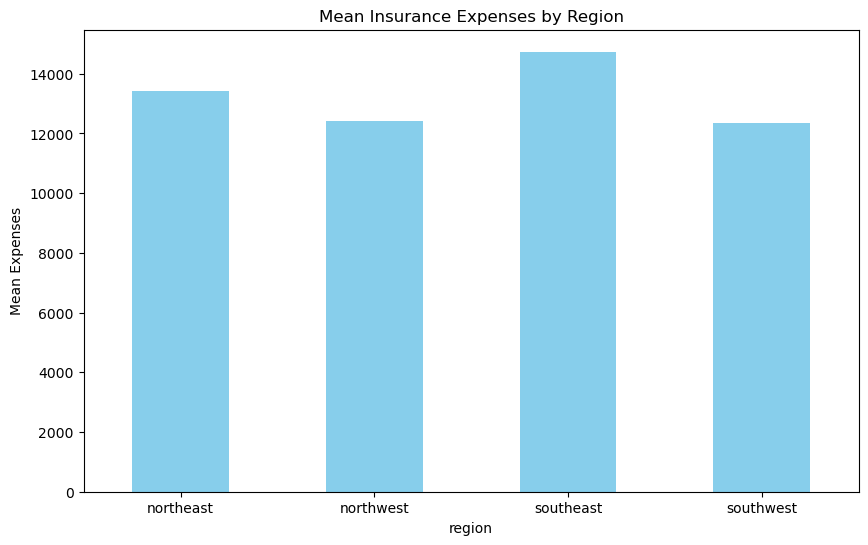

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# The dataset has 'region' and 'expenses' columns
mean_expenses_by_region = insurance.groupby('region')['expenses'].mean()

plt.figure(figsize=(10, 6))
plt.title('Mean Insurance Expenses by Region')
plt.xlabel('Region')
plt.ylabel('Mean Expenses')

# Create a bar chart for the mean expenses in each region
mean_expenses_by_region.plot(kind='bar', color='skyblue')

plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

plt.show()


## SQ 6:Is there a connection between the regions in the United States and insurance expenses?

- H0: Living in a region in the United States does not have an affect on insurance expenses 
- Ha: Living in a region in the United States does have an affect on insurance expenses

## 1.0 Anova
Performing an Analysis of Variance (ANOVA) for region  assist to understand whether there are statistically significant differences in the mean insurance expenses among different regions.

In [27]:
import pandas as pd
from scipy import stats

for region in regions:
    region_data.append(insurance[insurance['region'] == region]['expenses'])

# Perform an ANOVA test
f_statistic, p_value = stats.f_oneway(*region_data)

alpha = 0.05  # Set your significance level

# Print the results
print(f'F-statistic: {f_statistic:.2f}')
print(f'p-value: {p_value:.4f}')

if p_value < alpha:
    print("Reject the null hypothesis (Ha): Living in a region in the United States does have an effect on insurance expenses.")
else:
    print("Fail to reject the null hypothesis (H0): Living in a region in the United States does not have an effect on insurance expenses.")


F-statistic: 2.55
p-value: 0.0130
Reject the null hypothesis (Ha): Living in a region in the United States does have an effect on insurance expenses.


- the analysis indicates that there is a significant difference in insurance expenses based on the region, and there is statistical evidence to support this conclusion.

## 1.1 Assumptions for Anova

It is a must to test for assumptions for  ANOVA testing 

The assumptions for one-way ANOVA are:
1. *Sample independence*: each sample has been drawn independently of the other samples
2. *Normality*: each sample is taken from a normally distributed population 
3.  *Equal variance*: the variance of data within the different groups should be the same

### 1.2. Testing for normality
- *Compute the residuals*: the residuals are computes by simply subtracting from the measurements of each segment the mean value for that segment and dividing by the standard deviation of each segment.

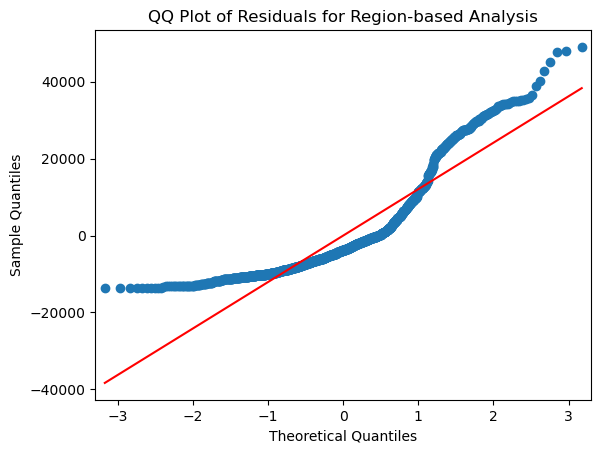

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Calculate residuals
all_residuals = np.concatenate([data - data.mean() for data in region_data])

# Create a QQ plot
sm.qqplot(all_residuals, line='s')

# Add labels and title
plt.title('QQ Plot of Residuals for Region-based Analysis')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()



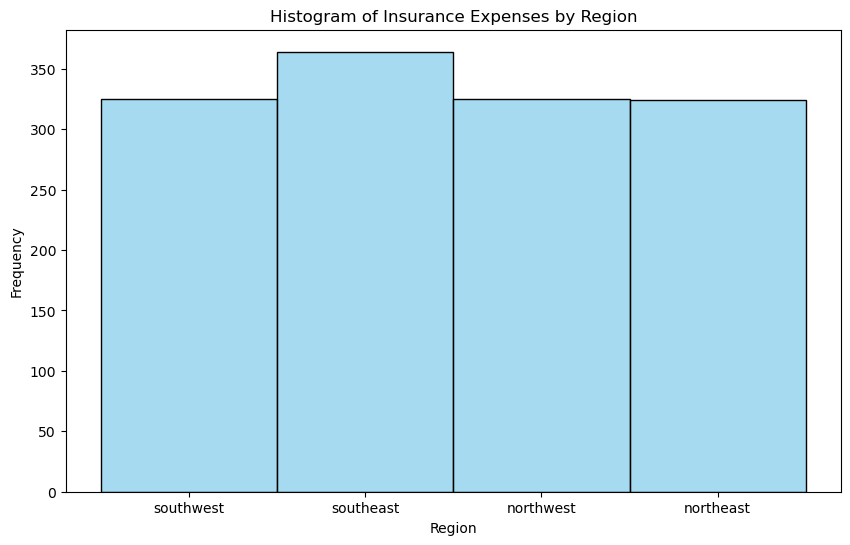

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns  

# insurance in the DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(data=insurance, x='region', color='skyblue', bins='auto', multiple="stack")

# Add labels and title
plt.title('Histogram of Insurance Expenses by Region')
plt.xlabel('Region')
plt.ylabel('Frequency')

# Show the plot
plt.show()


- based on the QQ and Histogram it means that the data is not normally distrubted and that means that we have to use the levene's test for variance

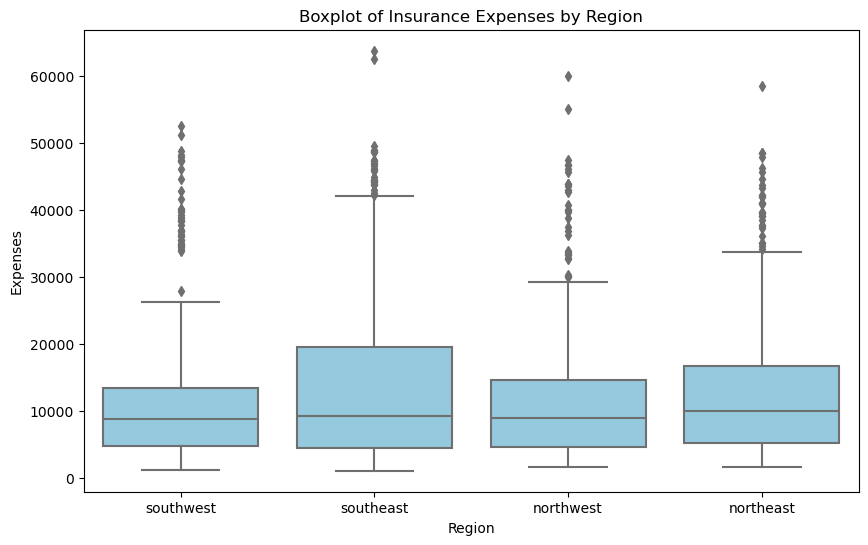

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional, for styling

# insurance is in the DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='expenses', data=insurance, color='skyblue')

# Add labels and title
plt.title('Boxplot of Insurance Expenses by Region')
plt.xlabel('Region')
plt.ylabel('Expenses')

# Show the plot
plt.show()


- The boxplot helps to visually analyzing the data first for testing equal variance

## 1.3 Testing for Equal Variance
- Levene Test
- The reason for checking is whether the variances of different groups are significantly different and it does this by comparing the variances between groups with the variances within the age groups.

In [24]:
from scipy.stats import levene

#insurance is in the DataFrame
regions = insurance['region'].unique()
region_data = [insurance[insurance['region'] == region]['expenses'] for region in regions]

# Perform Levene's test
statistic, p_value = levene(*region_data)

alpha = 0.05  # Set your significance level

# Print the results
print(f'Levene\'s Test - p-value: {p_value:.4f}')

if p_value < alpha:
    print("Reject the null hypothesis: Variances are not equal across regions.")
else:
    print("Fail to reject the null hypothesis: Variances are equal across regions.")


Levene's Test - p-value: 0.0009
Reject the null hypothesis: Variances are not equal across regions.


- This indicates that the variability in insurance expenses is significantly different between at least two regions.

## Conclusion
The combination of Levene's test and the ANOVA test indicates that not only are the variances different across regions, but there are also significant differences in the mean insurance expenses among the regions. Thus, the region in which an individual lives appears to be associated with variations in insurance expenses.
